In [1]:
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

     |████████████████████████████████| 285 kB 16.6 MB/s eta 0:00:01


Data loading

In [2]:
raw_data=pd.read_csv(r'heloc_dataset_v1.csv')
raw_data=raw_data.drop_duplicates()

In [ ]:
raw_data.duplicated().astype(int).sum()

In [3]:
raw_data.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9872 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     9872 non-null   object
 1   ExternalRiskEstimate                9872 non-null   int64 
 2   MSinceOldestTradeOpen               9872 non-null   int64 
 3   MSinceMostRecentTradeOpen           9872 non-null   int64 
 4   AverageMInFile                      9872 non-null   int64 
 5   NumSatisfactoryTrades               9872 non-null   int64 
 6   NumTrades60Ever2DerogPubRec         9872 non-null   int64 
 7   NumTrades90Ever2DerogPubRec         9872 non-null   int64 
 8   PercentTradesNeverDelq              9872 non-null   int64 
 9   MSinceMostRecentDelq                9872 non-null   int64 
 10  MaxDelq2PublicRecLast12M            9872 non-null   int64 
 11  MaxDelqEver                         9872 non-null   int

In [5]:
raw_data.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,...,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000,9872.000000
mean,71.962723,195.668152,9.583874,78.755774,21.115883,0.579315,0.382901,92.344003,7.698541,5.755166,...,34.605855,0.189526,1.453606,1.394753,34.042139,42.022387,3.908428,1.568071,0.553383,66.294571
std,10.262339,101.971506,12.965164,34.084198,11.328820,1.246122,1.002107,11.851561,20.728410,1.657701,...,17.958877,5.854242,2.141077,2.101050,29.215152,41.615398,3.361019,3.348623,2.614026,22.265433
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,64.000000,131.000000,3.000000,57.000000,13.000000,0.000000,0.000000,89.000000,-7.000000,5.000000,...,21.000000,0.000000,0.000000,0.000000,8.000000,-8.000000,2.000000,1.000000,0.000000,50.000000
50%,72.000000,183.000000,6.000000,76.000000,20.000000,0.000000,0.000000,97.000000,0.000000,6.000000,...,33.000000,0.000000,1.000000,1.000000,28.000000,52.000000,3.000000,2.000000,1.000000,67.000000
75%,80.000000,255.000000,12.000000,96.250000,28.000000,1.000000,0.000000,100.000000,15.000000,7.000000,...,45.000000,1.000000,2.000000,2.000000,56.000000,80.000000,5.000000,3.000000,1.000000,83.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


In [6]:
X=raw_data.iloc[:,1:]
Y=(raw_data.iloc[:,0]=='Bad').astype(int)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
X_train,X_validation,Y_train,Y_validation=train_test_split(X_train,Y_train,test_size=0.25,random_state=1)
train_data=pd.concat([X_train,Y_train],axis=1)
corr_matrix=train_data.corr()
corr_matrix['RiskPerformance'].sort_values(ascending=False)

RiskPerformance                       1.000000
NetFractionRevolvingBurden            0.339774
PercentTradesWBalance                 0.283204
NumTrades60Ever2DerogPubRec           0.155382
PercentInstallTrades                  0.152766
NumInqLast6M                          0.138176
NumInqLast6Mexcl7days                 0.132894
NumTrades90Ever2DerogPubRec           0.127007
NetFractionInstallBurden              0.097132
NumTradesOpeninLast12M                0.075234
NumRevolvingTradesWBalance            0.066351
MSinceMostRecentDelq                  0.064153
NumInstallTradesWBalance              0.062595
NumBank2NatlTradesWHighUtilization    0.042855
MSinceMostRecentTradeOpen            -0.043069
MSinceMostRecentInqexcl7days         -0.115873
NumTotalTrades                       -0.122671
NumSatisfactoryTrades                -0.162168
MaxDelqEver                          -0.208903
MSinceOldestTradeOpen                -0.215129
MaxDelq2PublicRecLast12M             -0.229802
AverageMInFil

In [7]:
n_rows = raw_data.shape[0]
n_cols = raw_data.shape[1]
col_names = raw_data.columns
row_indexes = raw_data.index
series_customer5 = raw_data.iloc[5,:]
print('Number of rows:', n_rows)
print('Number of columns:', n_cols)
print('Column names', col_names,'\n')
print('Example of a customer #5\n', series_customer5,'\n')

Number of rows: 9872
Number of columns: 24
Column names Index(['RiskPerformance', 'ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance'],
      dtype='object') 

Example of a customer #5
 RiskPerformance                       Bad
ExternalRiskEstimate                   59
MSinceOldestTradeOpen                 137
MSinceMostRecentTradeOpen              11
AverageMInFile                         7

Data Visualization

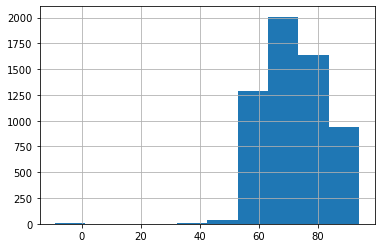

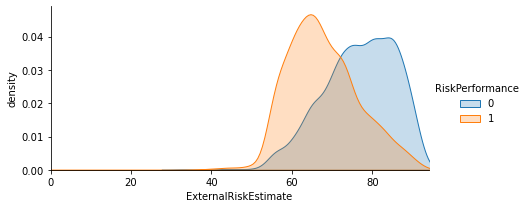

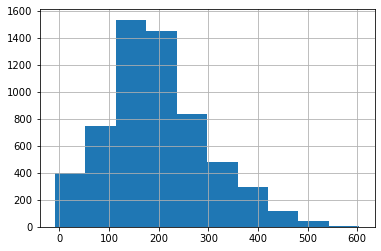

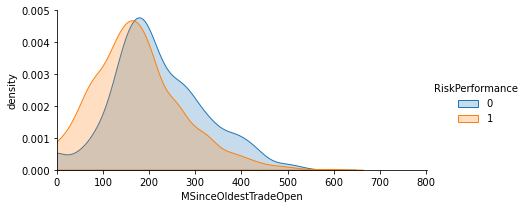

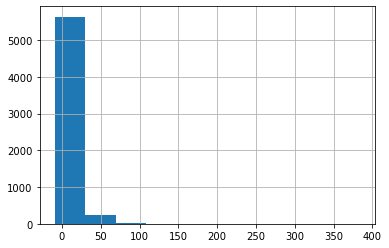

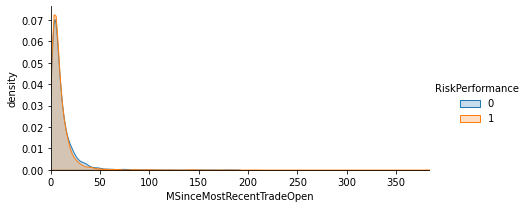

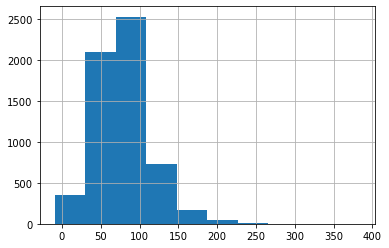

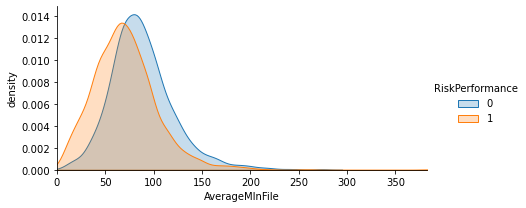

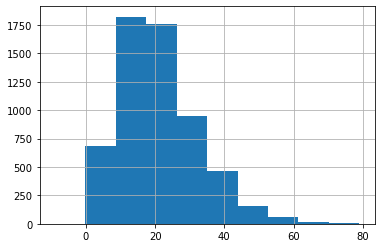

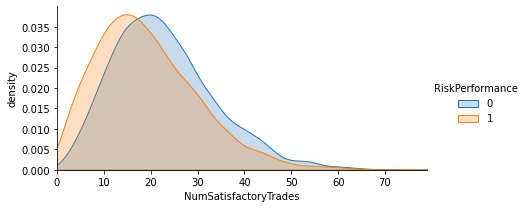

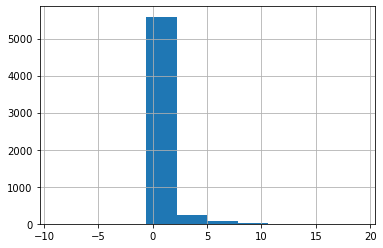

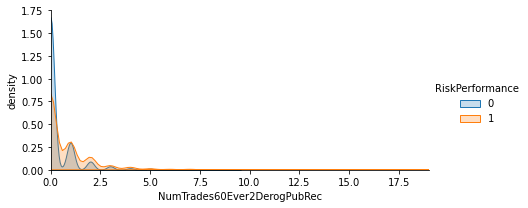

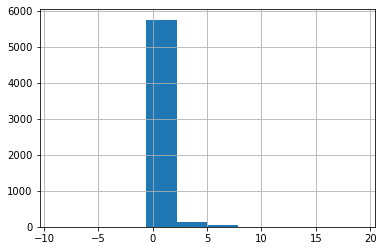

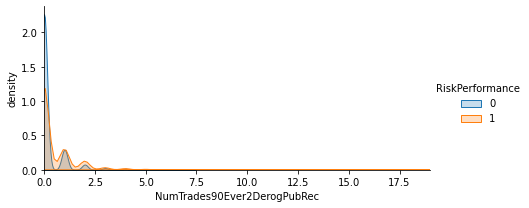

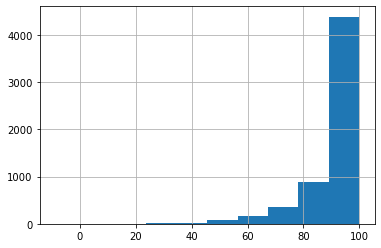

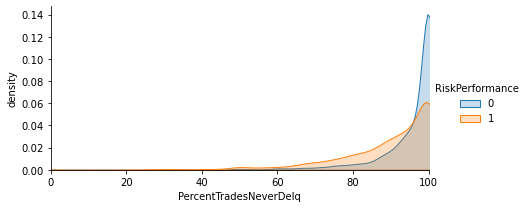

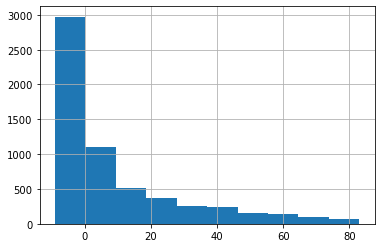

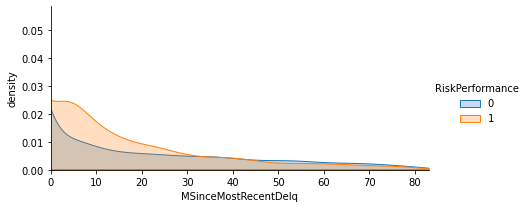

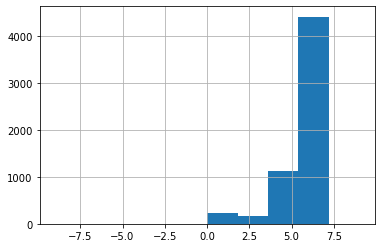

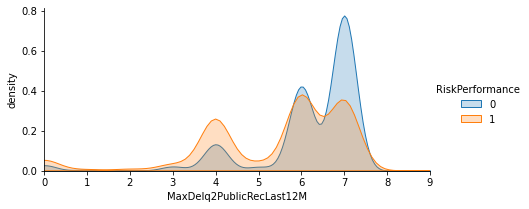

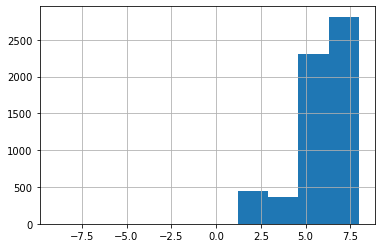

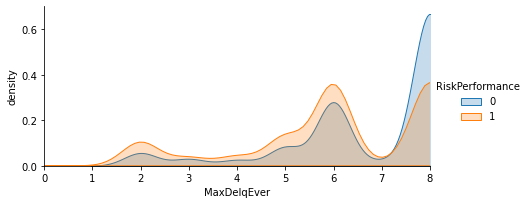

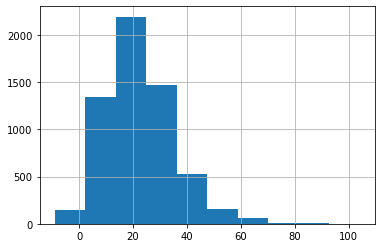

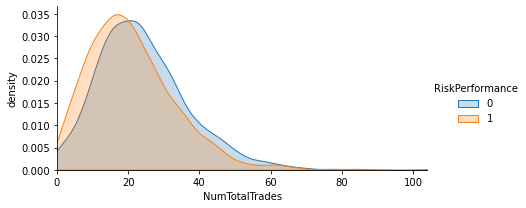

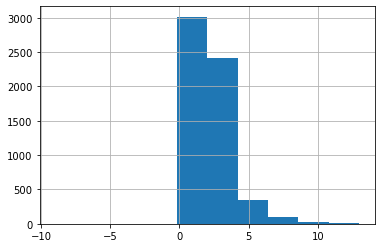

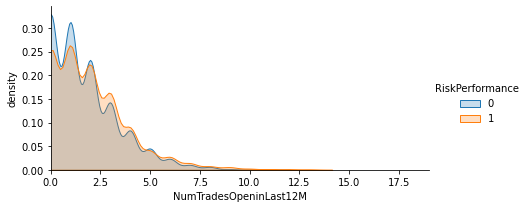

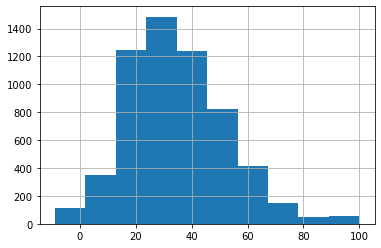

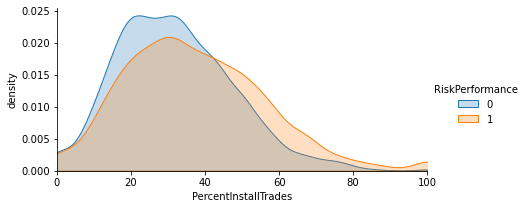

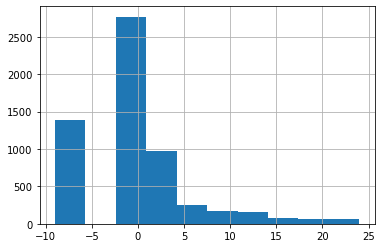

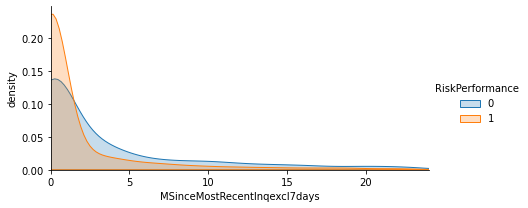

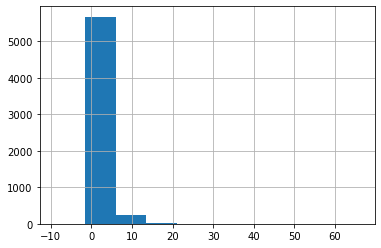

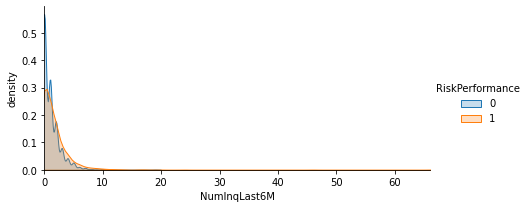

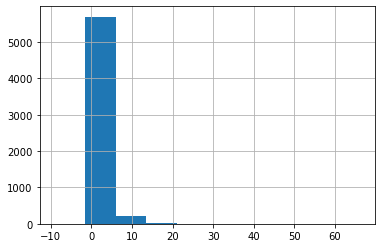

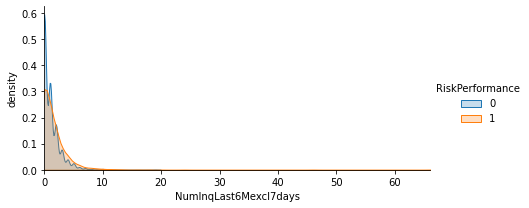

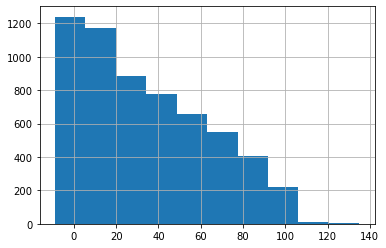

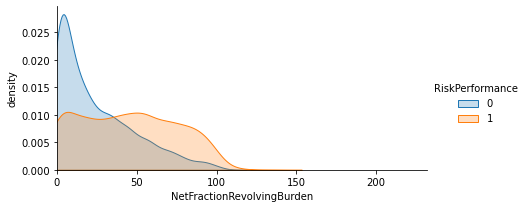

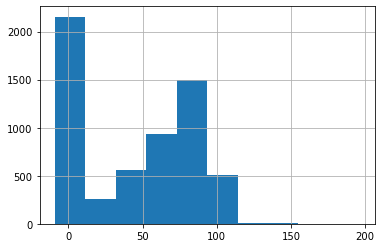

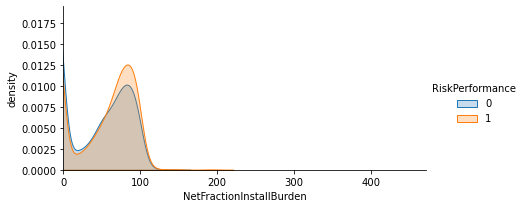

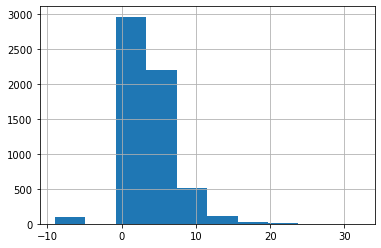

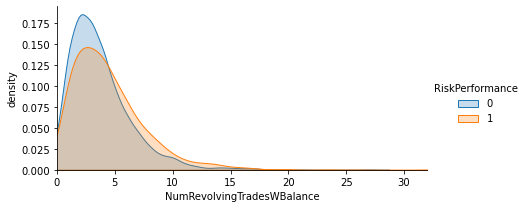

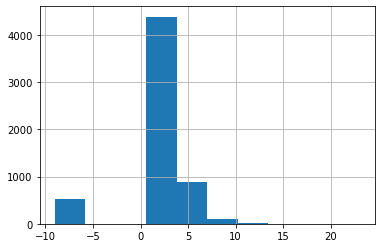

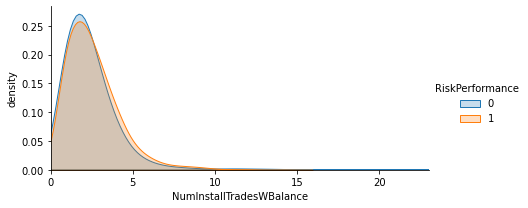

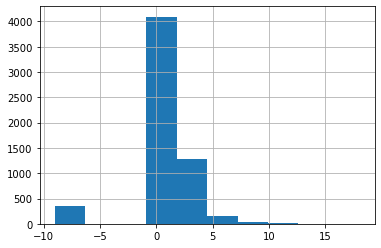

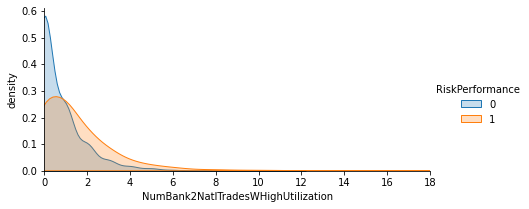

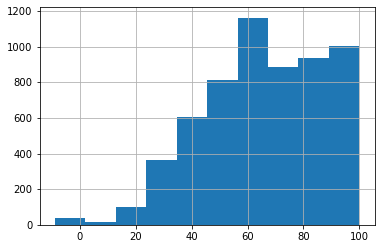

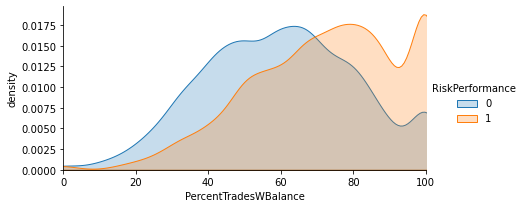

In [23]:
def get_plot(xattribute,yattribute,data):
    data[xattribute].hist()
    plt.show()
    facet = sns.FacetGrid(data, hue=yattribute, aspect=2)
    facet.map(sns.kdeplot, xattribute, shade=True)
    facet.set(xlim=(0, raw_data[xattribute].max()))
    facet.add_legend()
    plt.xlabel(xattribute)
    plt.ylabel('density')
    plt.show()
for i in train_data.iloc[:,:-1].columns:
    get_plot(i,'RiskPerformance',train_data)

In [24]:
'''
GOOD performance raises when
    MaxDelqEver>7
    NumInqLast6M<5
    MaxDelq2PublickRecLast12M>6
    NumTrades90Ever2DerogPubRec<1
    NumTrades60Ever2DerogPubRec<1
'''

'\nGOOD performance raises when\n    MaxDelqEver>7\n    NumInqLast6M<5\n    MaxDelq2PublickRecLast12M>6\n    NumTrades90Ever2DerogPubRec<1\n    NumTrades60Ever2DerogPubRec<1\n'

Data Preparing

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [9]:
imputer=SimpleImputer(strategy='median')
scaler=MinMaxScaler()
data_pipeline=Pipeline([('Replace -7',SimpleImputer(missing_values=-7,strategy='median')),
                        ('Replace -8',SimpleImputer(missing_values=-8,strategy='median')),
                        ('Replace -9',SimpleImputer(missing_values=-9,strategy='median')),
                        ('Sacler',MinMaxScaler()),
                        ])
X_train_scale=pd.DataFrame(data_pipeline.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_validation_scale=pd.DataFrame(data_pipeline.transform(X_validation),columns=X_test.columns,index=X_validation.index)
X_test_scale=pd.DataFrame(data_pipeline.transform(X_test),columns=X_test.columns,index=X_test.index)

Model Training

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [11]:
log_reg=LogisticRegression(random_state=1).fit(X_train_scale,Y_train)
nb=BernoulliNB().fit(X_train_scale,Y_train)
ld=LinearDiscriminantAnalysis().fit(X_train_scale,Y_train)
rfc=RandomForestClassifier(random_state=1).fit(X_train_scale,Y_train)
gbrt=GradientBoostingClassifier(random_state=1).fit(X_train_scale,Y_train)
svc=SVC(probability = True).fit(X_train_scale, Y_train)
knn=KNeighborsClassifier().fit(X_train_scale,Y_train)
ann=MLPClassifier().fit(X_train_scale,Y_train)

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [12]:
Model_names=['Logistic','Naive_Bayes','Linear','RandomForest','GradientBoosting','SVC','KNN','ANN']

In [13]:
Train_accuracy=pd.DataFrame(
    np.array([round(accuracy_score(Y_train,log_reg.predict(X_train_scale)),3),
     round(accuracy_score(Y_train,nb.predict(X_train_scale)),3),
     round(accuracy_score(Y_train,ld.predict(X_train_scale)),3),
     round(accuracy_score(Y_train,rfc.predict(X_train_scale)),3),
     round(accuracy_score(Y_train,gbrt.predict(X_train_scale)),3),
     round(accuracy_score(Y_train,svc.predict(X_train_scale)),3),
     round(accuracy_score(Y_train,knn.predict(X_train_scale)),3),
     round(accuracy_score(Y_train,ann.predict(X_train_scale)),3)]).reshape([1,8]),
    columns=Model_names,index=['Train_accuracy']
)


In [14]:
Test_accuracy=pd.DataFrame(np.array([
    round(accuracy_score(Y_validation,log_reg.predict(X_validation_scale)),3),
    round(accuracy_score(Y_validation,nb.predict(X_validation_scale)),3),
    round(accuracy_score(Y_validation,ld.predict(X_validation_scale)),3),
    round(accuracy_score(Y_validation,rfc.predict(X_validation_scale)),3),
    round(accuracy_score(Y_validation,gbrt.predict(X_validation_scale)),3),
    round(accuracy_score(Y_validation,svc.predict(X_validation_scale)),3),
    round(accuracy_score(Y_validation,knn.predict(X_validation_scale)),3),
    round(accuracy_score(Y_validation,ann.predict(X_validation_scale)),3)]).reshape([1,8]),
                           columns=Model_names,index=['Validation_accuracy'])
Compare_accuracy=pd.concat([Train_accuracy,Test_accuracy],axis=0)

In [15]:
print(Compare_accuracy)

                     Logistic  Naive_Bayes  Linear  RandomForest  \
Train_accuracy          0.733        0.651   0.734         1.000   
Validation_accuracy     0.738        0.678   0.737         0.736   

                     GradientBoosting    SVC    KNN    ANN  
Train_accuracy                  0.765  0.739  0.788  0.750  
Validation_accuracy             0.735  0.754  0.707  0.741  


In [16]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix

def draw_ROC(model, x, y):
    scores = model.predict_proba(x)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y,scores)
    recall = recall_score(y, model.predict(x))
    conf_matrix = confusion_matrix(y, model.predict(x))
#    print(conf_matrix)
#    print(conf_matrix.ravel())
    tn = conf_matrix.ravel()[0] # conf_matrix[0][0]
    fp = conf_matrix.ravel()[1] # conf_matrix[0][1]
    fn = conf_matrix.ravel()[2] # conf_matrix[1][0]
    tp = conf_matrix.ravel()[3] # conf_matrix[1][1]
    fprs = fp / (fp + tn)
    auc = metrics.auc(fpr, tpr)
#   scores = model.predict_proba(x)[:,1]
#   fpr, tpr, thresholds = metrics.roc_curve(y, scores)
#   auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(5,5))
    lw = 2 # linewidth
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.5f)' % auc)
#   plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {auc:.2f})') # f-string
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right");
    plt.plot(fprs, recall, marker="x", markeredgewidth=5, markersize=12);
    plt.show()

In [17]:
    scores=rfc.predict_proba(X_train_scale)[:,1]
    fpr,tpr,thresholds = metrics.roc_curve(Y_train,scores)
    recall = recall_score(Y_train, rfc.predict(X_train_scale))
    conf_matrix = confusion_matrix(Y_train, rfc.predict(X_train_scale))
    tn = conf_matrix.ravel()[0]
    fp = conf_matrix.ravel()[1]
    fn = conf_matrix.ravel()[2]
    tp = conf_matrix.ravel()[3]
    fprs = fp / (fp + tn)
    auc = metrics.auc(fpr,tpr)
    print(auc)

1.0


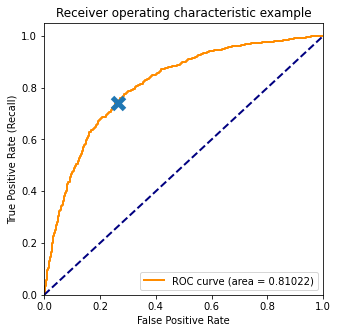

In [47]:
draw_ROC(log_reg,X_validation_scale,Y_validation)


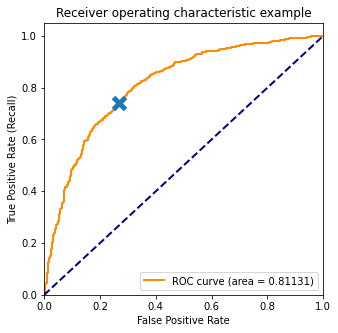

In [48]:
draw_ROC(ld,X_validation_scale,Y_validation)

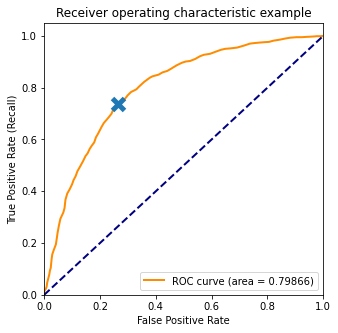

In [49]:
draw_ROC(rfc,X_validation_scale,Y_validation)

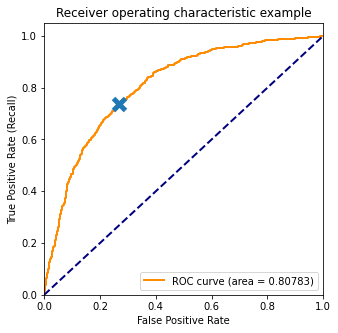

In [50]:
draw_ROC(gbrt,X_validation_scale,Y_validation)

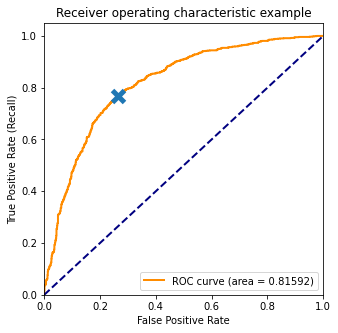

In [51]:
draw_ROC(svc,X_validation_scale,Y_validation)

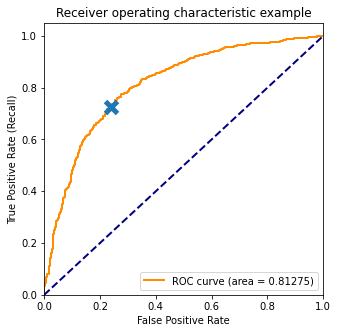

In [65]:
draw_ROC(ann,X_validation_scale,Y_validation)

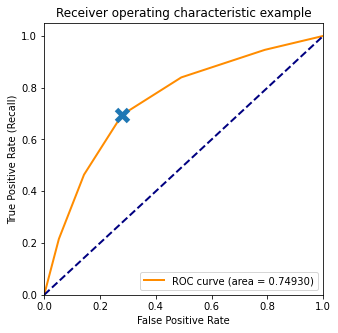

In [64]:
draw_ROC(knn,X_validation_scale,Y_validation)

In [18]:
models=[log_reg,nb,ld,rfc,gbrt,svc,knn,ann]
FNR=[]
Recall=[]
for i in models:
    conf_matrix = confusion_matrix(Y_validation, i.predict(X_validation_scale))
    accuracy = accuracy_score(Y_validation,i.predict(X_validation_scale))
    tn = conf_matrix.ravel()[0]
    fp = conf_matrix.ravel()[1]
    fn = conf_matrix.ravel()[2]
    tp = conf_matrix.ravel()[3]
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    tnr = tn/(tn+fp)
    fnr = fn/(tp+fn)
    recall = recall_score(Y_validation,i.predict(X_validation_scale))
    precision = precision_score(Y_validation,i.predict(X_validation_scale))
    FNR.append(fnr)
    Recall.append(recall)

Conf_df = pd.DataFrame(np.array([FNR,Recall]).reshape([2,-1]),columns = Model_names,index=['FNR','Recall'])

In [19]:
Conf_df

,Logistic,Naive_Bayes,Linear,RandomForest,GradientBoosting,SVC,KNN,ANN
FNR,0.258869,0.370086,0.259827,0.263663,0.262704,0.231064,0.30489,0.288591
Recall,0.741131,0.629914,0.740173,0.736337,0.737296,0.768936,0.69511,0.711409


Learning Curve

In [20]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

In [21]:
X_scale=data_pipeline.transform(X)

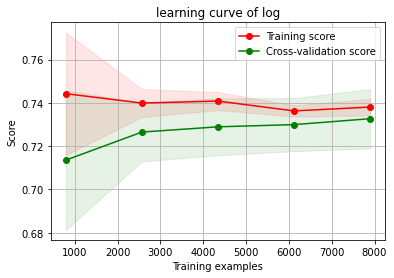

In [57]:
plot_learning_curve(svc,'learning curve of log',X_scale,Y)

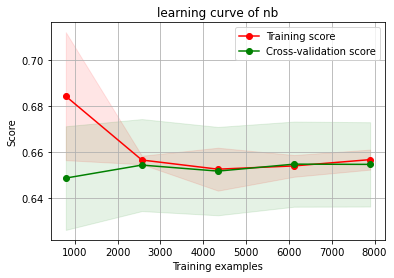

In [358]:
plot_learning_curve(nb,'learning curve of nb',X_scale,Y)

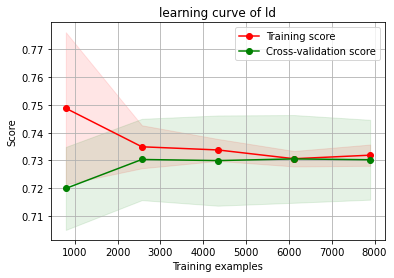

In [58]:
plot_learning_curve(ld,'learning curve of ld',X_scale,Y)

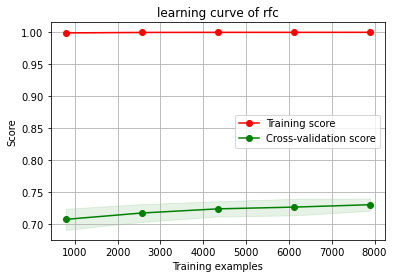

In [111]:
plot_learning_curve(rfc,'learning curve of rfc',X_scale,Y)

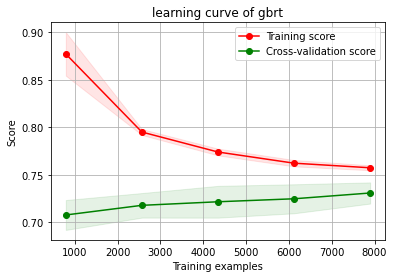

In [60]:
plot_learning_curve(gbrt,'learning curve of gbrt',X_scale,Y)

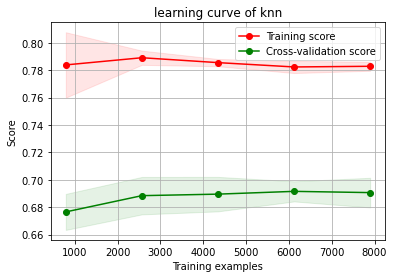

In [362]:
plot_learning_curve(knn,'learning curve of knn',X_scale,Y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multi

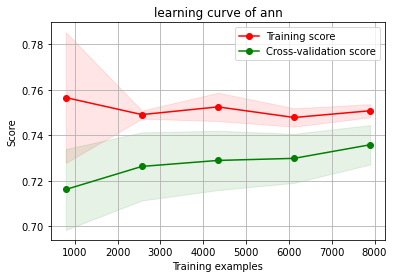

In [250]:
plot_learning_curve(ann,'learning curve of ann',X_scale,Y)

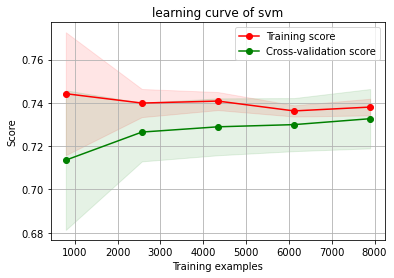

In [364]:
plot_learning_curve(svc,'learning curve of svm',X_scale,Y)

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid=[{'n_estimators':[100, 500, 1000],'min_samples_split':[25, 50, 75, 100],'max_features': ['auto', None]}]
rf=RandomForestClassifier()
grid_search=GridSearchCV(rf,param_grid,cv=10,scoring='roc_auc',n_jobs=-1)
grid_search.fit(X_train_scale,Y_train)


KeyboardInterrupt: 

In [ ]:
grid_search.best_estimator_

In [24]:

best_rfc = RandomForestClassifier(min_samples_split=75, n_estimators=500).fit(X_train_scale,Y_train)

In [25]:
print(round(accuracy_score(Y_train,best_rfc.predict(X_train_scale)),3),
round(accuracy_score(Y_validation,best_rfc.predict(X_validation_scale)),3))

0.783 0.739


In [140]:
plot_learning_curve(best_rfc,'learning curve of best_rfc',X_scale,Y)

[[661 271]
 [248 795]]
[661 271 248 795]


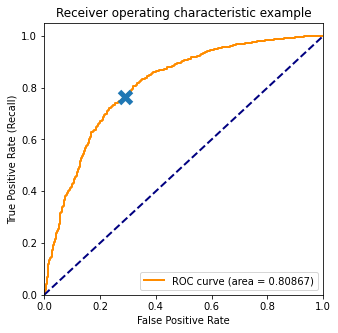

In [188]:
draw_ROC(best_rfc,X_validation_scale,Y_validation)

In [171]:
param_grid = [{'n_estimators': [190, 200, 210], 'learning_rate': [0.07, 0.08, 0.09], 'min_samples_split': [75, 80, 85], 'max_depth': [1, 2, 3]}]
gbrt_model=GradientBoostingClassifier()
grid_search=GridSearchCV(gbrt_model,param_grid,cv=5,scoring='roc_auc',n_jobs=-1)
grid_search.fit(X_train_scale, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.07, 0.08, 0.09],
                          'max_depth': [1, 2, 3],
                          'min_samples_split': [75, 80, 85],
                          'n_estimators': [190, 200, 210]}],
             scoring='roc_auc')

In [172]:
grid_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.09, max_depth=2,
                           min_samples_split=85, n_estimators=190)

In [26]:
best_gbrt = GradientBoostingClassifier(learning_rate=0.09, max_depth=2,
                           min_samples_split=85, n_estimators=190).fit(X_train_scale,Y_train)

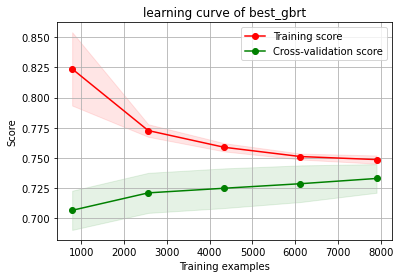

In [174]:
plot_learning_curve(best_gbrt,'learning curve of best_gbrt',X_scale,Y)

In [27]:
print(round(accuracy_score(Y_train,best_gbrt.predict(X_train_scale)),2),
round(accuracy_score(Y_validation,best_gbrt.predict(X_validation_scale)),2))
print(round(accuracy_score(Y_validation,best_gbrt.predict(X_validation_scale)),2))

0.75 0.73
0.73


[[681 251]
 [275 768]]
[681 251 275 768]


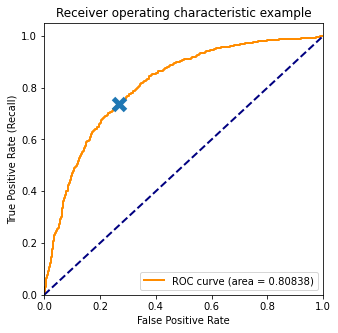

In [189]:
draw_ROC(best_gbrt,X_validation_scale,Y_validation)

If size of dataset is great, use GradientBoostingClassifier to avoid overfitting.

In [208]:
parameters = {
'gamma': ['auto'],
'C': range(12, 20),
}
svc_model=SVC(probability=True)
grid_search=GridSearchCV(svc_model,parameters,cv=10,scoring='roc_auc',n_jobs=-1)
grid_search.fit(X_train_scale, Y_train) 

GridSearchCV(cv=10, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': range(7, 13),
                         'gamma': ['auto', 'scale', 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='roc_auc')

In [209]:
grid_search.best_estimator_

SVC(C=12, gamma='auto', probability=True)

In [28]:
best_svc = SVC(C=12, gamma='auto', probability=True).fit(X_train_scale,Y_train)

In [30]:
print(round(accuracy_score(Y_train,best_svc.predict(X_train_scale)),4),
round(accuracy_score(Y_validation,best_svc.predict(X_validation_scale)),4),
round(accuracy_score(Y_validation,best_svc.predict(X_validation_scale)),4))


0.7367 0.7423 0.7423


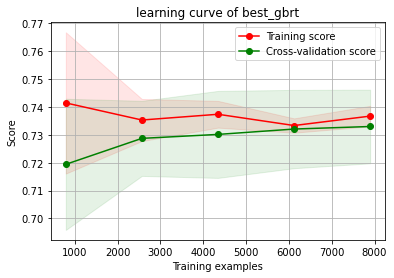

In [33]:
plot_learning_curve(best_svc,'learning curve of best_gbrt',X_scale,Y)

[[685 247]
 [262 781]]
[685 247 262 781]


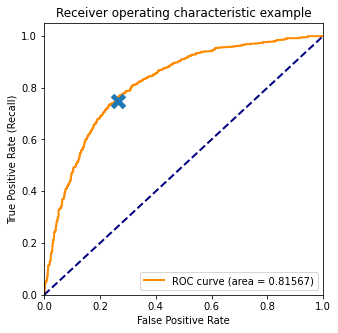

In [223]:
draw_ROC(best_svc, X_validation_scale, Y_validation)

If the size of datast is smaller than 5000, use SVC.

Cross-validation

In [ ]:
from sklearn.model_selection import cross_validate
cv_result=cross_validate(best_gbrt,X_train_scale,Y_train,cv=5)
cv_result2=cross_validate(best_svc,X_train_scale,Y_train,cv=5)

In [ ]:
print(cv_result['test_score'].mean())

In [ ]:
print(cv_result2['test_score'].mean())

In [235]:
parameters = {
    'hidden_layer_sizes': [25, 50, 100],
    'activation': ['relu', 'logistic'],
    'alpha': [0.00001, 0.0001, 0.0002, 0.0004, 0.0008, 0.001],
    'max_iter': [50, 100, 200, 400],
}
ann_model = MLPClassifier()
grid_search = GridSearchCV(ann_model,parameters,cv=10,scoring='roc_auc',n_jobs=-1)
grid_search.fit(X_train_scale, Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [1e-05, 0.0001, 0.0002, 0.0004, 0.0008,
                                   0.001],
                         'hidden_layer_sizes': [25, 50, 100],
                         'max_iter': [50, 100, 200, 400]},
             scoring='roc_auc')

In [236]:
grid_search.best_estimator_

MLPClassifier(alpha=0.0008, hidden_layer_sizes=100, max_iter=100)

In [31]:
best_ann = MLPClassifier(alpha=0.0008, hidden_layer_sizes=100, max_iter=100).fit(X_train_scale, Y_train)

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [32]:
print(
    accuracy_score(Y_train,best_ann.predict(X_train_scale)),
    accuracy_score(Y_validation,best_ann.predict(X_validation_scale)),
    accuracy_score(Y_test,best_ann.predict(X_test_scale))
)

0.7429922323539345 0.7443037974683544 0.7134177215189873


[[720 212]
 [290 753]]
[720 212 290 753]


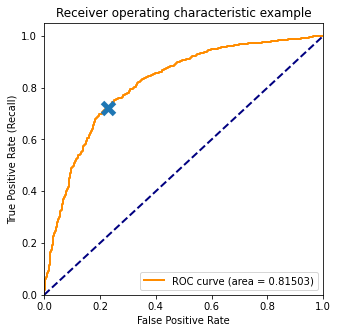

In [249]:
draw_ROC(best_ann,X_validation_scale,Y_validation)

In [ ]:
from sklearn.model_selection import cross_validate
cv_result=cross_validate(best_gbrt,X_train_scale,Y_train,cv=5)
cv_result2=cross_validate(best_svc,X_train_scale,Y_train,cv=5)